# Visualize significance tables as heatmaps

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PARAMS import *

In [2]:
def load_and_transform(path, strain):
    df = pd.read_csv(path)
    ts = df[df['strain']==strain].drop(['strain'], axis=1)
    ts = ts.pivot(columns='group1', index='group2', values='significance')
    sigs = { 'ns': 0,
       '*': 1,
      '**': 2,
     '***': 3,
    '****': 4 }
    ts = ts.replace(sigs)
    return ts

def plot_sigs(df, ticklabel_dict):
    gre = [i for i in reversed(greys_5)]
    my_colors = sns.color_palette(gre, n_colors=5)
    ax = sns.heatmap(df, 
                vmin = 0,
                vmax = 5,
                cmap= my_colors,
                cbar_kws={'ticks':[0.5, 1.5,2.5,3.5,4.5]})
    cbar = ax.collections[0].colorbar
    cbar.ax.set_yticklabels(['ns', '*', '**', '***', '****'])
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.ylabel('')
    plt.xlabel('')
    for label in ax.get_xticklabels():
        if label.get_text() in ticklabel_dict.keys():
            label.set(**ticklabel_dict[label.get_text()])
    for label in ax.get_yticklabels():
        if label.get_text() in ticklabel_dict.keys():
            label.set(**ticklabel_dict[label.get_text()])
    return ax

def get_bold_labels(medium, strain):
    cgx_ts = medium[medium['strain'] == strain]
    cgx_growth = cgx_ts[cgx_ts['OD fold change'] >= 3]['short'].to_list()
    ticklabel_dict = {label: {"fontweight": "bold"} 
                  for label in cgx_growth}
    return ticklabel_dict

## CGXII

In [3]:
cgx_path = '../data/agg/CGXII_sig_additives.csv'
cgx_time = [v for k, v in pd.read_csv('../data/agg/CGXII_OD.csv').groupby('time')]
cgx = cgx_time[1]
cgx['OD fold change'] = cgx_time[1]['OD'].values / cgx_time[0]['OD'].values
cgx['strain'].replace(STRAINS_LAB, inplace=True)
cgx = cgx[['strain','short','OD fold change']]
cgx = cgx.groupby(['strain', 'short']).mean().reset_index()

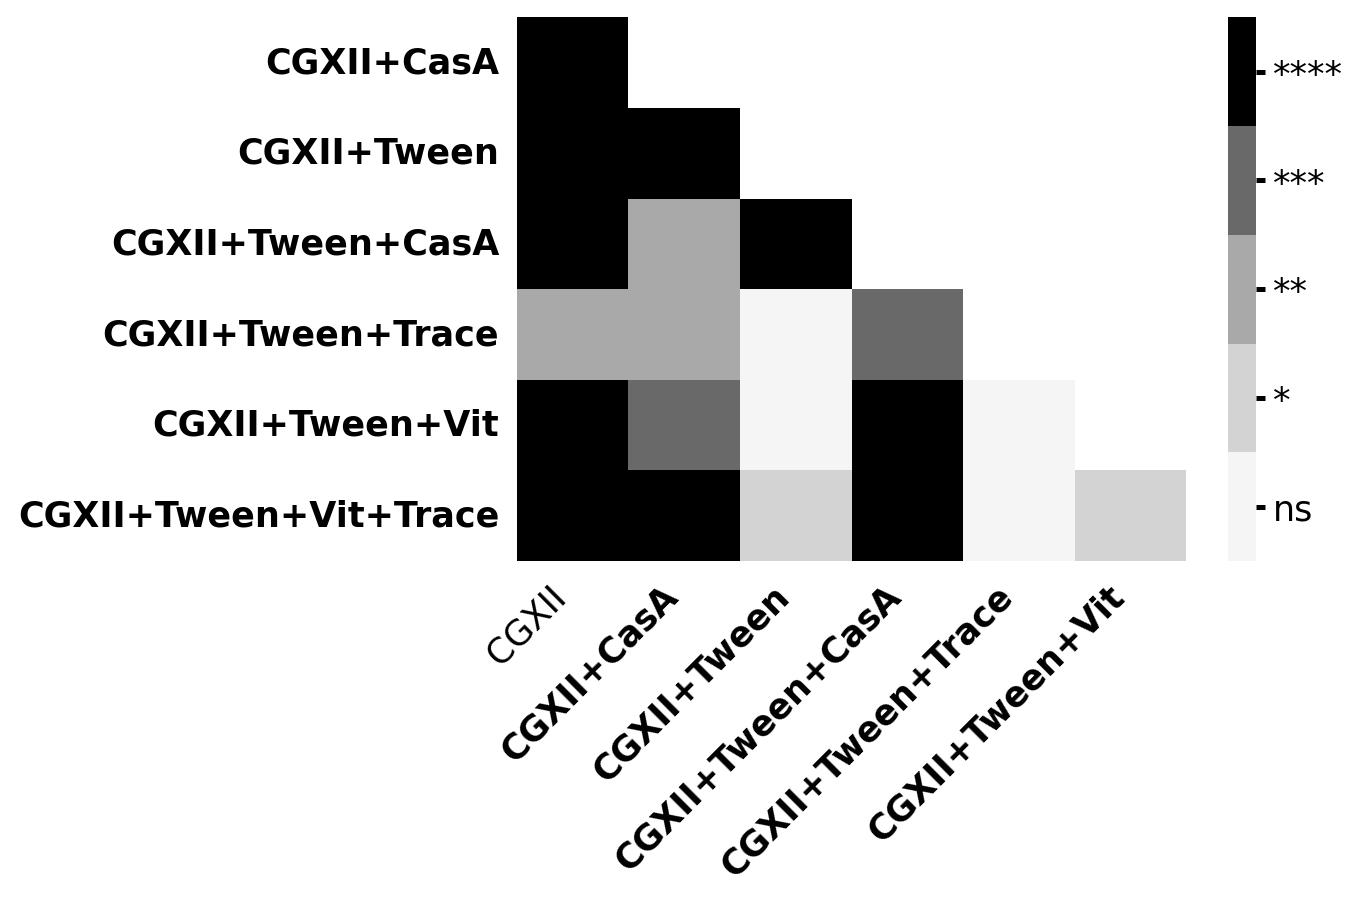

In [4]:
strain = 'TS'
ticklabel_dict = get_bold_labels(cgx, strain)
df_ts = load_and_transform(cgx_path, strain)
ax = plot_sigs(df_ts, ticklabel_dict)
plt.savefig('../figures/sigs/CGXII_14.png', bbox_inches='tight', dpi=300)

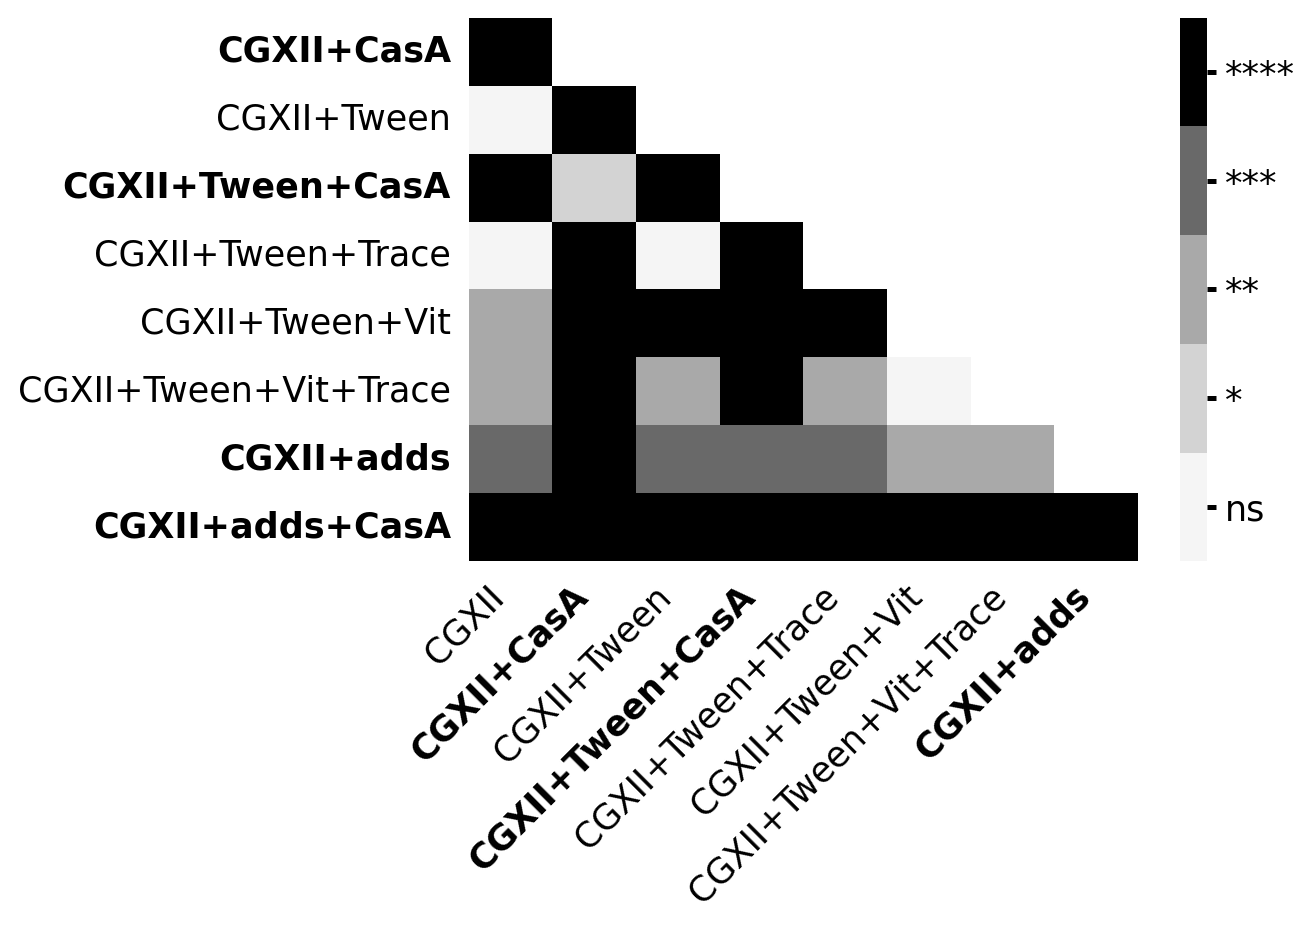

In [5]:
strain = '1197'
ticklabel_dict = get_bold_labels(cgx, strain)
df_1197 = load_and_transform(cgx_path, strain)
plot_sigs(df_1197, ticklabel_dict)
plt.savefig('../figures/sigs/CGXII_15.png', bbox_inches='tight', dpi=300)

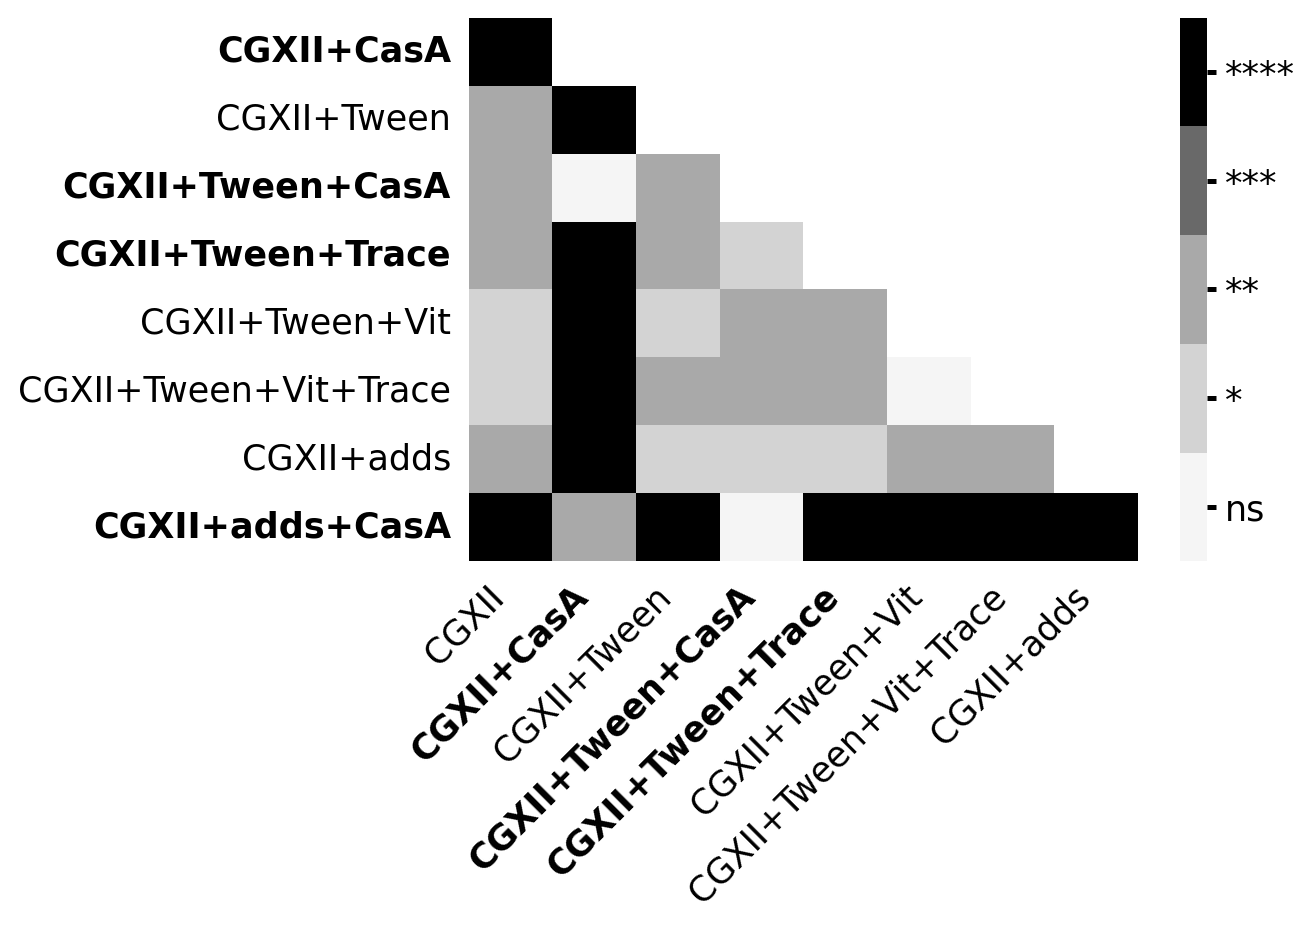

In [6]:
strain = '1115'
ticklabel_dict = get_bold_labels(cgx, strain)
df_1115 = load_and_transform(cgx_path, strain)
plot_sigs(df_1115, ticklabel_dict)
plt.savefig('../figures/sigs/CGXII_16.png', bbox_inches='tight', dpi=300)

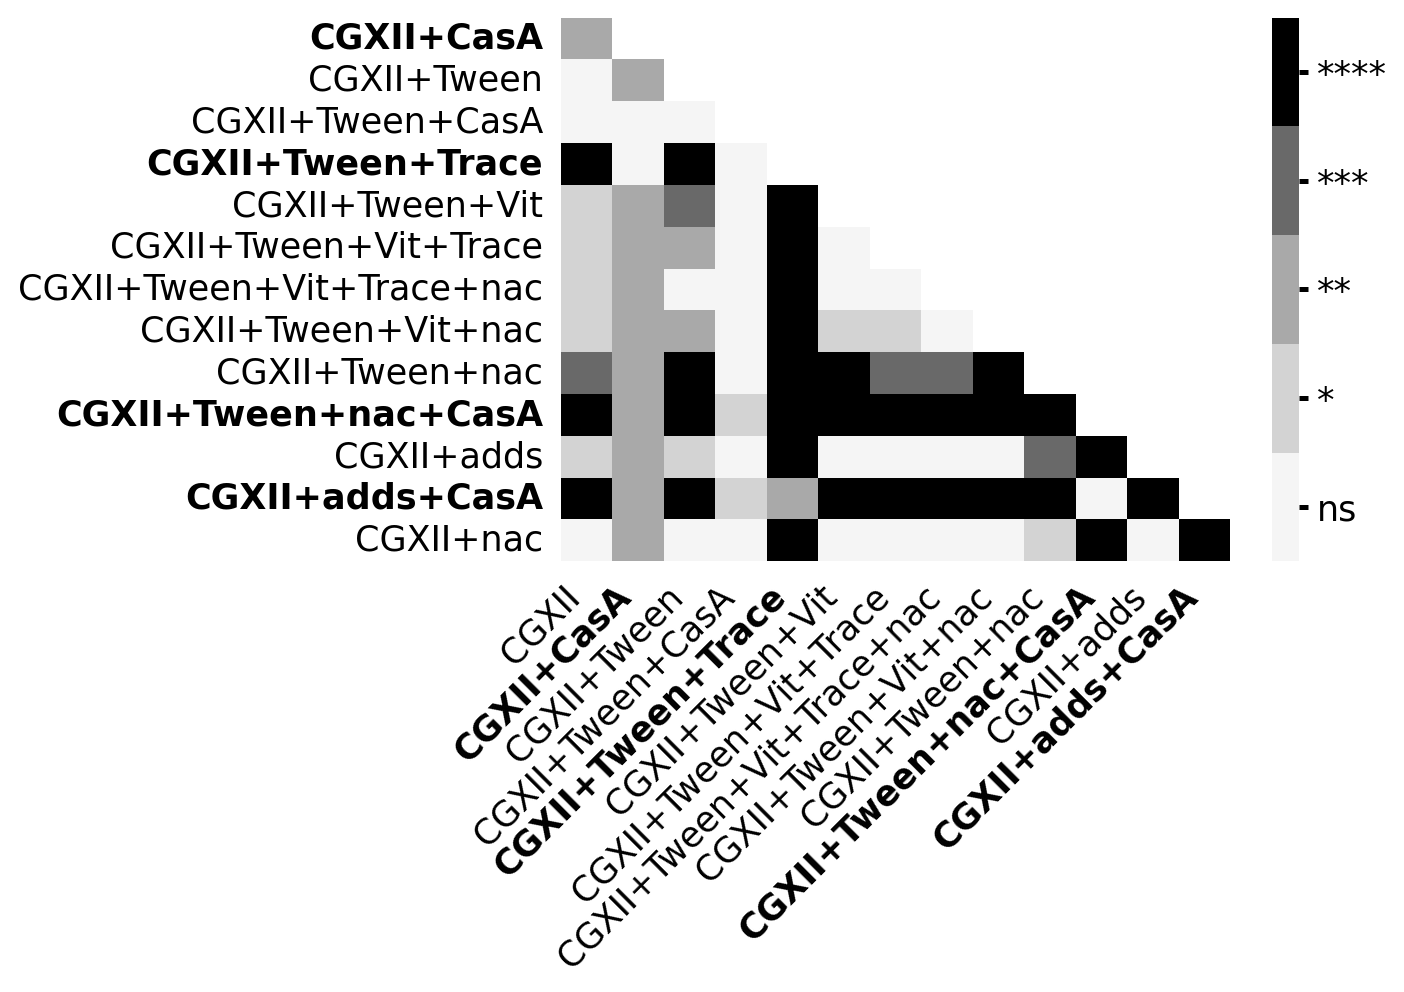

In [7]:
strain = '1116'
ticklabel_dict = get_bold_labels(cgx, strain)
df_1116 = load_and_transform(cgx_path, strain)
plot_sigs(df_1116, ticklabel_dict)
plt.savefig('../figures/sigs/CGXII_17.png', bbox_inches='tight', dpi=300)

## M9

In [8]:
m9_path = '../data/agg/M9_sig_additives.csv'
m9_time = [v for k, v in pd.read_csv('../data/agg/M9_OD.csv').groupby('time')]
m9 = m9_time[1]
m9['OD fold change'] = m9_time[1]['OD'].values / m9_time[0]['OD'].values
m9['strain'].replace(STRAINS_LAB, inplace=True)
m9 = m9[['strain','short','OD fold change']]
m9 = m9.groupby(['strain', 'short']).mean().reset_index()

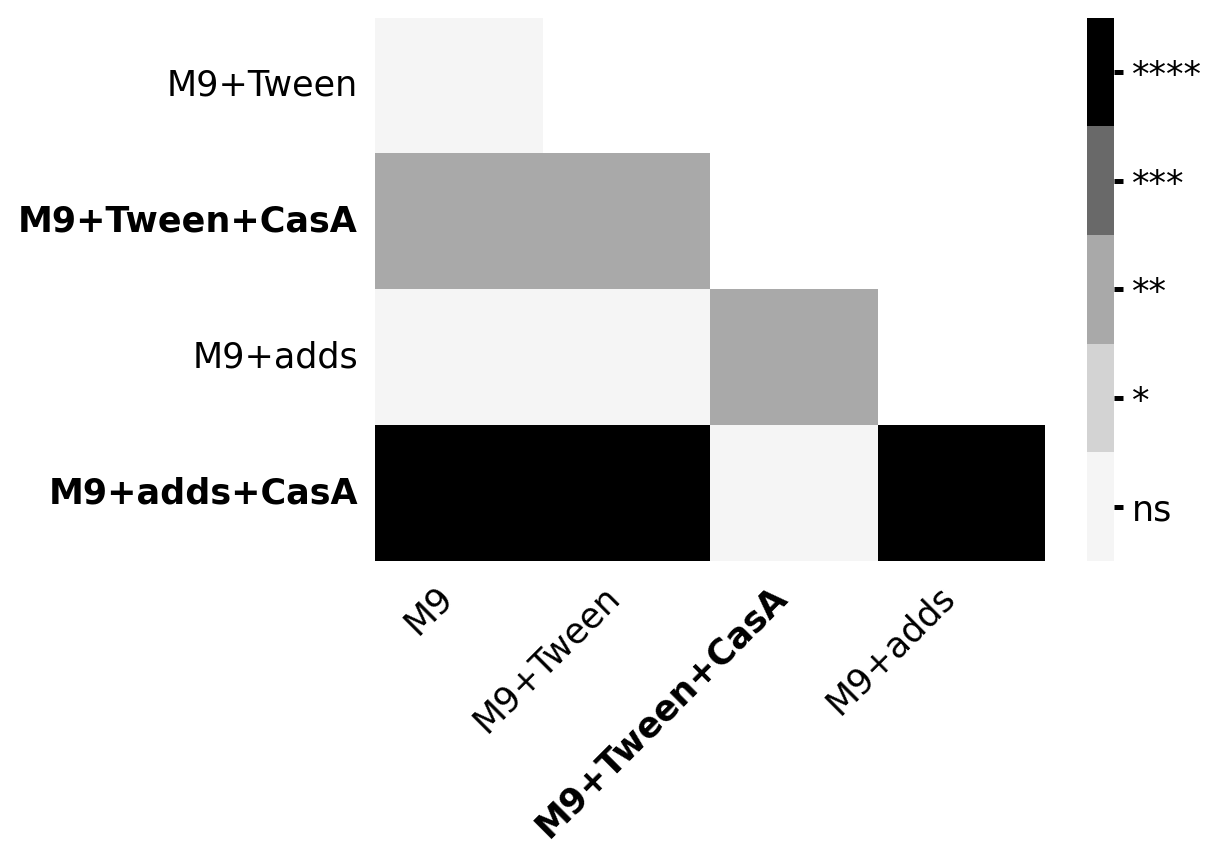

In [9]:
strain = 'TS'
ticklabel_dict = get_bold_labels(m9, strain)
df_ts = load_and_transform(m9_path, strain)
plot_sigs(df_ts, ticklabel_dict)
plt.savefig('../figures/sigs/M9_14.png', bbox_inches='tight', dpi=300)

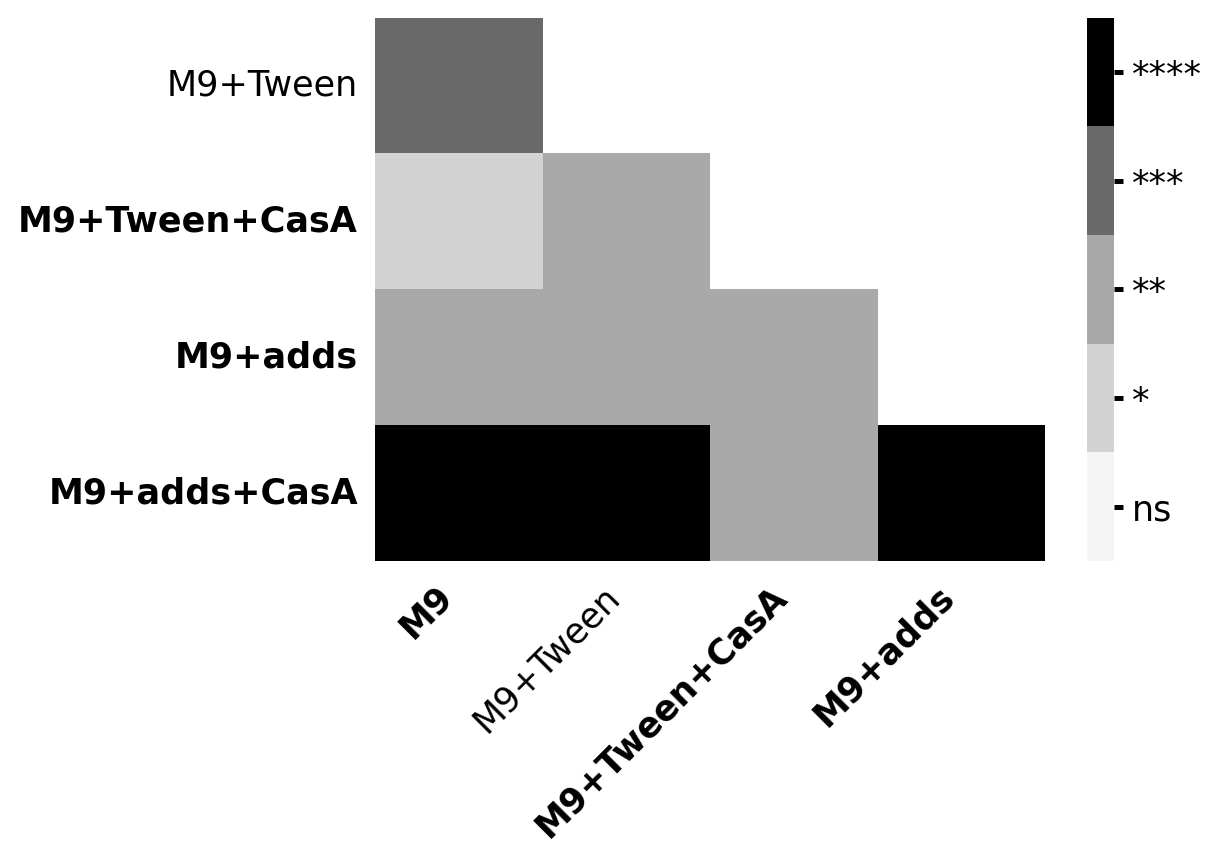

In [10]:
strain = '1197'
ticklabel_dict = get_bold_labels(m9, strain)
df_1197 = load_and_transform(m9_path, strain)
plot_sigs(df_1197, ticklabel_dict)
plt.savefig('../figures/sigs/M9_15.png', bbox_inches='tight', dpi=300)

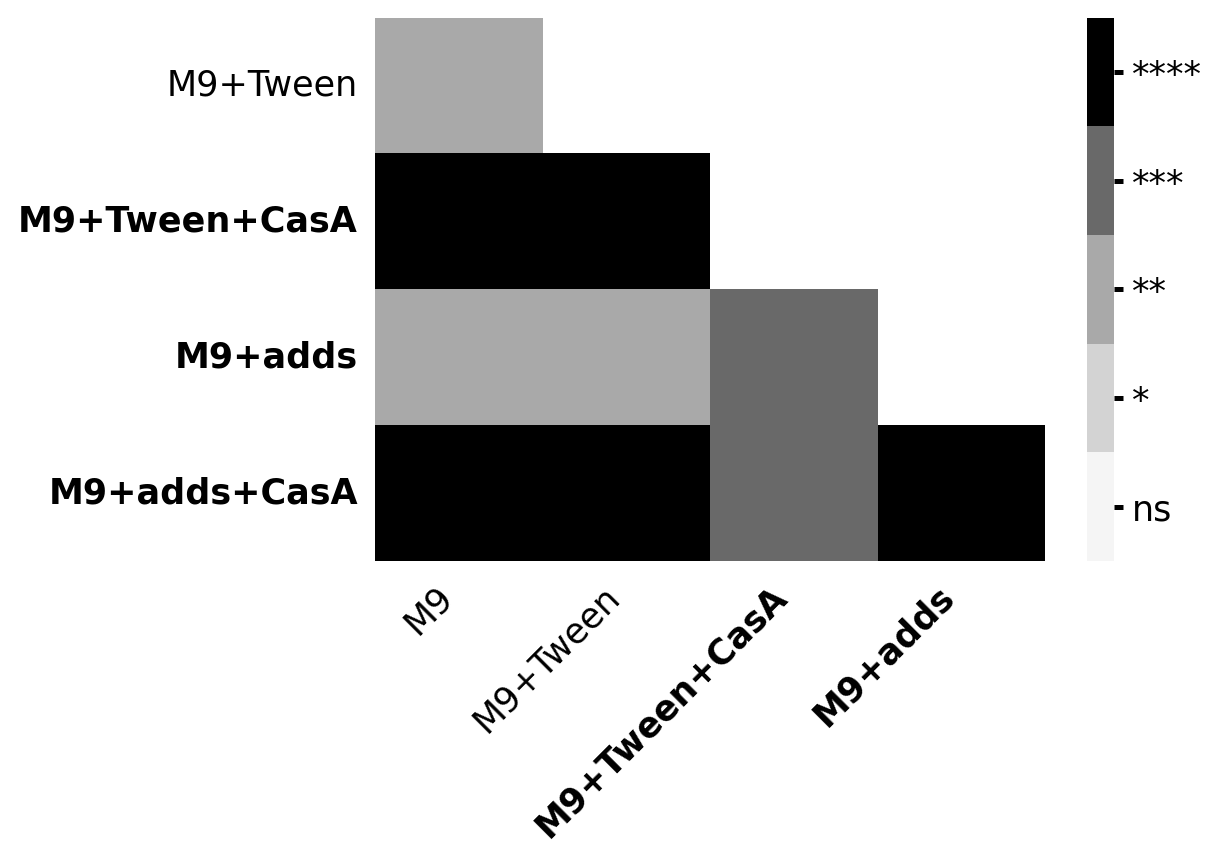

In [11]:
strain = '1115'
ticklabel_dict = get_bold_labels(m9, strain)
df_1115 = load_and_transform(m9_path, strain)
plot_sigs(df_1115, ticklabel_dict)
plt.savefig('../figures/sigs/M9_16.png', bbox_inches='tight', dpi=300)

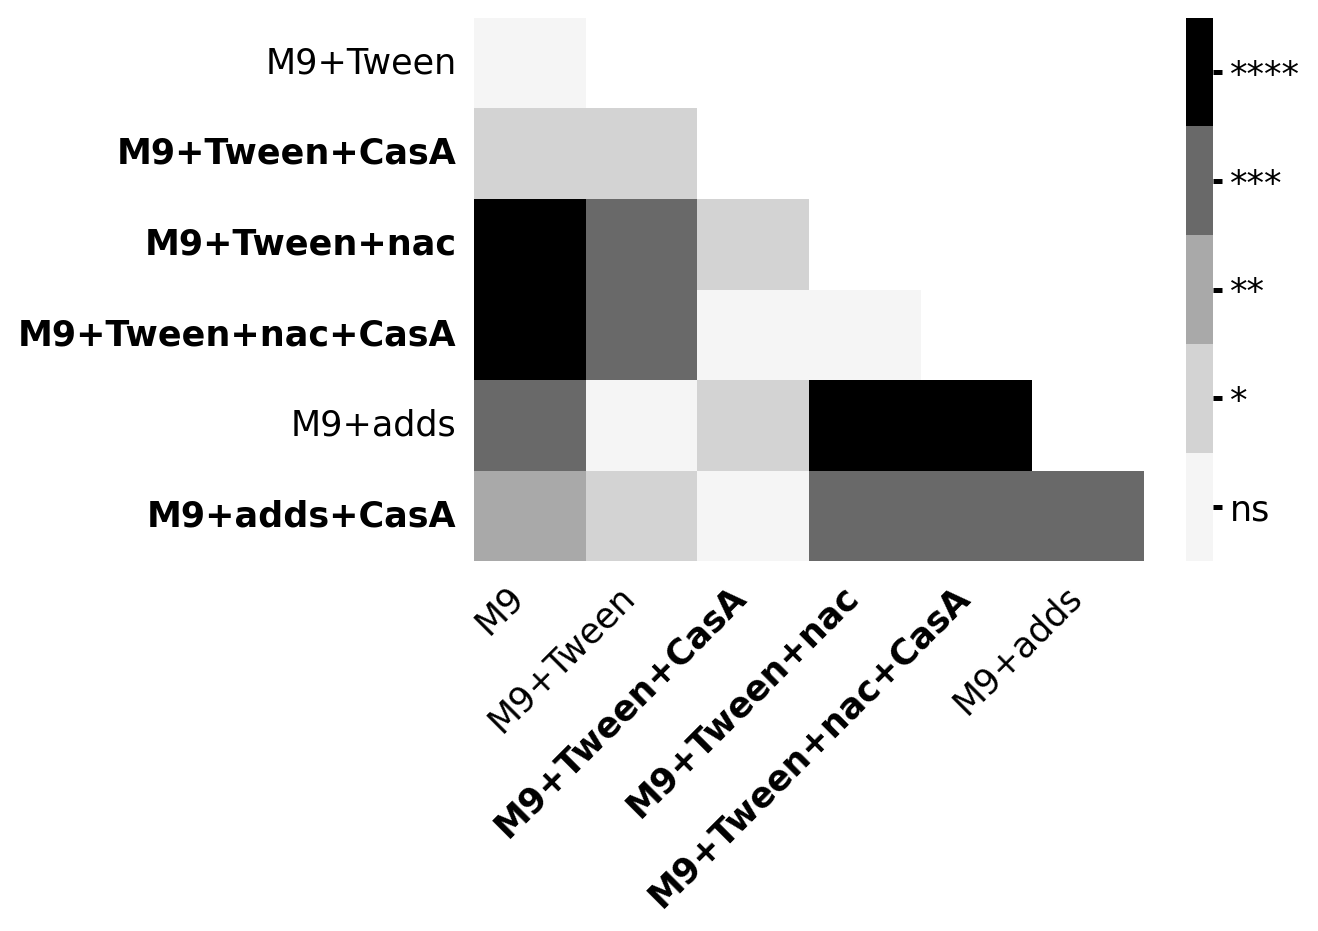

In [12]:
strain = '1116'
ticklabel_dict = get_bold_labels(m9, strain)
df_1116 = load_and_transform(m9_path, strain)
plot_sigs(df_1116, ticklabel_dict)
plt.savefig('../figures/sigs/M9_17.png', bbox_inches='tight', dpi=300)